In [167]:
# Gage Black
## Homework 5
### ECGR 4105
#### Parts 1-3



In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import torch
import imageio
import torch.optim as optim
import torch.nn as nn
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_breast_cancer
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from matplotlib.colors import ListedColormap
from matplotlib import pyplot as plt
from PIL import Image
from torchvision import transforms

In [169]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [170]:
#Using data from lecture from temperature and variables t_c, t_u
##Problem 1 Temperature predicition

t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

In [171]:
#Using formula given and defining model
def model(t_u, w1, w2, b):
    return w2 * t_u**2 + w1 * t_u + b

In [172]:
#using the loss calc variables given in lecture notes
w1 = torch.ones(())
w2 = torch.ones(())
b = torch.zeros(())
t_p = model(t_u, w1, w2, b)
t_p

tensor([1310.1901, 3180.7100, 3445.4399, 6789.5103, 3225.9900, 2440.1101,
        1183.1101,  497.0399, 2390.9600, 3708.5601, 4746.9600])

In [173]:
#Loss function (this is the avg loss)
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [174]:
loss = loss_fn(t_p, t_c)
loss

tensor(11709471.)

In [175]:
x = torch.ones(())
y = torch.ones(3,1)
z = torch.ones(1,3)
a = torch.ones(2, 1, 1)
print(f"shapes: x: {x.shape}, y: {y.shape}")
print(f"        z: {z.shape}, a: {a.shape}")
print("x * y:", (x * y).shape)
print("y * z:", (y * z).shape)
print("y * z * a:", (y * z * a).shape)

shapes: x: torch.Size([]), y: torch.Size([3, 1])
        z: torch.Size([1, 3]), a: torch.Size([2, 1, 1])
x * y: torch.Size([3, 1])
y * z: torch.Size([3, 3])
y * z * a: torch.Size([2, 3, 3])


In [176]:
delta = 0.1

loss_rate_of_change_w = \
    (loss_fn(model(t_u, w2 + delta, w1 + delta, b), t_c) -
     loss_fn(model(t_u, w2 - delta, w1 - delta, b), t_c)) / (2.0 * delta)

In [177]:
learning_rate = 1e-2

w = (w2+w1) - learning_rate * loss_rate_of_change_w
w

tensor(-235103.4375)

In [178]:

loss_rate_of_change_b = \
    (loss_fn(model(t_u, w2, w1, b + delta), t_c) -
     loss_fn(model(t_u, w2, w1, b - delta), t_c)) / (2.0 * delta)

b = b - learning_rate * loss_rate_of_change_b
b

tensor(-59.6500)

In [179]:
#defining all the functions used from the slides provided in canvas

def dloss_fn(t_p, t_c):
    dsq_diffs = 2 * (t_p - t_c) / t_p.size(0)
    return dsq_diffs


def dmodel_dw1(t_u, w2, w1, b):
    return t_u


def dmodel_db(t_u, w2, w1, b):
    return 1.0


def dmodel_dw2(t_u, w1, w2, b):
    return t_u**2


def grad_fn(t_u, t_c, t_p, w1, w2, b):
    dloss_dtp = dloss_fn(t_p, t_c)
    dloss_dw1 = dloss_dtp * dmodel_dw1(t_u, w1, w2, b)
    dloss_dw2 = dloss_dtp * dmodel_dw2(t_u, w1, w2, b)
    dloss_db = dloss_dtp * dmodel_db(t_u, w1 , w2, b)
    return torch.stack([dloss_dw1.sum(), dloss_dw2.sum(), dloss_db.sum()])

In [180]:
#Creating training loop including the n_epochs,learning rate, and defined paeameters


def training_loop(nEpochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        w, b = params

        t_p = model(t_u, w, b)  # <1>
        loss = loss_fn(t_p, t_c)
        grad = grad_fn(t_u, t_c, t_p, w, b)  # <2>

        params = params - learning_rate * grad

        print('Epoch %d, Loss %f' % (epoch, float(loss))) # <3>

    return params

In [181]:
def training_loop(nEpochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, nEpochs + 1):
        w1, w2, b = params
        t_p = model(t_u, w1, w2, b)
        loss = loss_fn(t_p, t_c)
        grad = grad_fn(t_u, t_c, t_p, w1, w2, b)
        params = params - learning_rate * grad
        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
    return params

In [182]:
#Using Normilization now

t_un = 0.1 * t_u

In [183]:
#Time to encoperate the learning rates defined
##Learning Rate as 0.1

params = training_loop(
nEpochs = 5000,
learning_rate = 0.1,
params = torch.tensor([1.0, 1.0, 0.0]), t_u = t_un, t_c = t_c)




Epoch 500, Loss nan
Epoch 1000, Loss nan
Epoch 1500, Loss nan
Epoch 2000, Loss nan
Epoch 2500, Loss nan
Epoch 3000, Loss nan
Epoch 3500, Loss nan
Epoch 4000, Loss nan
Epoch 4500, Loss nan
Epoch 5000, Loss nan


In [184]:
#Training with Learning Rate set as 0.01
params = training_loop(
nEpochs = 5000,
learning_rate = 0.01,
params = torch.tensor([1.0, 1.0, 0.0]), t_u = t_un, t_c = t_c)

Epoch 500, Loss nan
Epoch 1000, Loss nan
Epoch 1500, Loss nan
Epoch 2000, Loss nan
Epoch 2500, Loss nan
Epoch 3000, Loss nan
Epoch 3500, Loss nan
Epoch 4000, Loss nan
Epoch 4500, Loss nan
Epoch 5000, Loss nan


In [185]:
#Training with Learning Rate = 0.0001
params = training_loop(
nEpochs = 5000,
learning_rate = 0.0001,
params = torch.tensor([1.0, 1.0, 0.0]), t_u = t_un, t_c = t_c)

Epoch 500, Loss 10.708597
Epoch 1000, Loss 8.642083
Epoch 1500, Loss 7.171005
Epoch 2000, Loss 6.123476
Epoch 2500, Loss 5.377228
Epoch 3000, Loss 4.845286
Epoch 3500, Loss 4.465787
Epoch 4000, Loss 4.194724
Epoch 4500, Loss 4.000802
Epoch 5000, Loss 3.861744


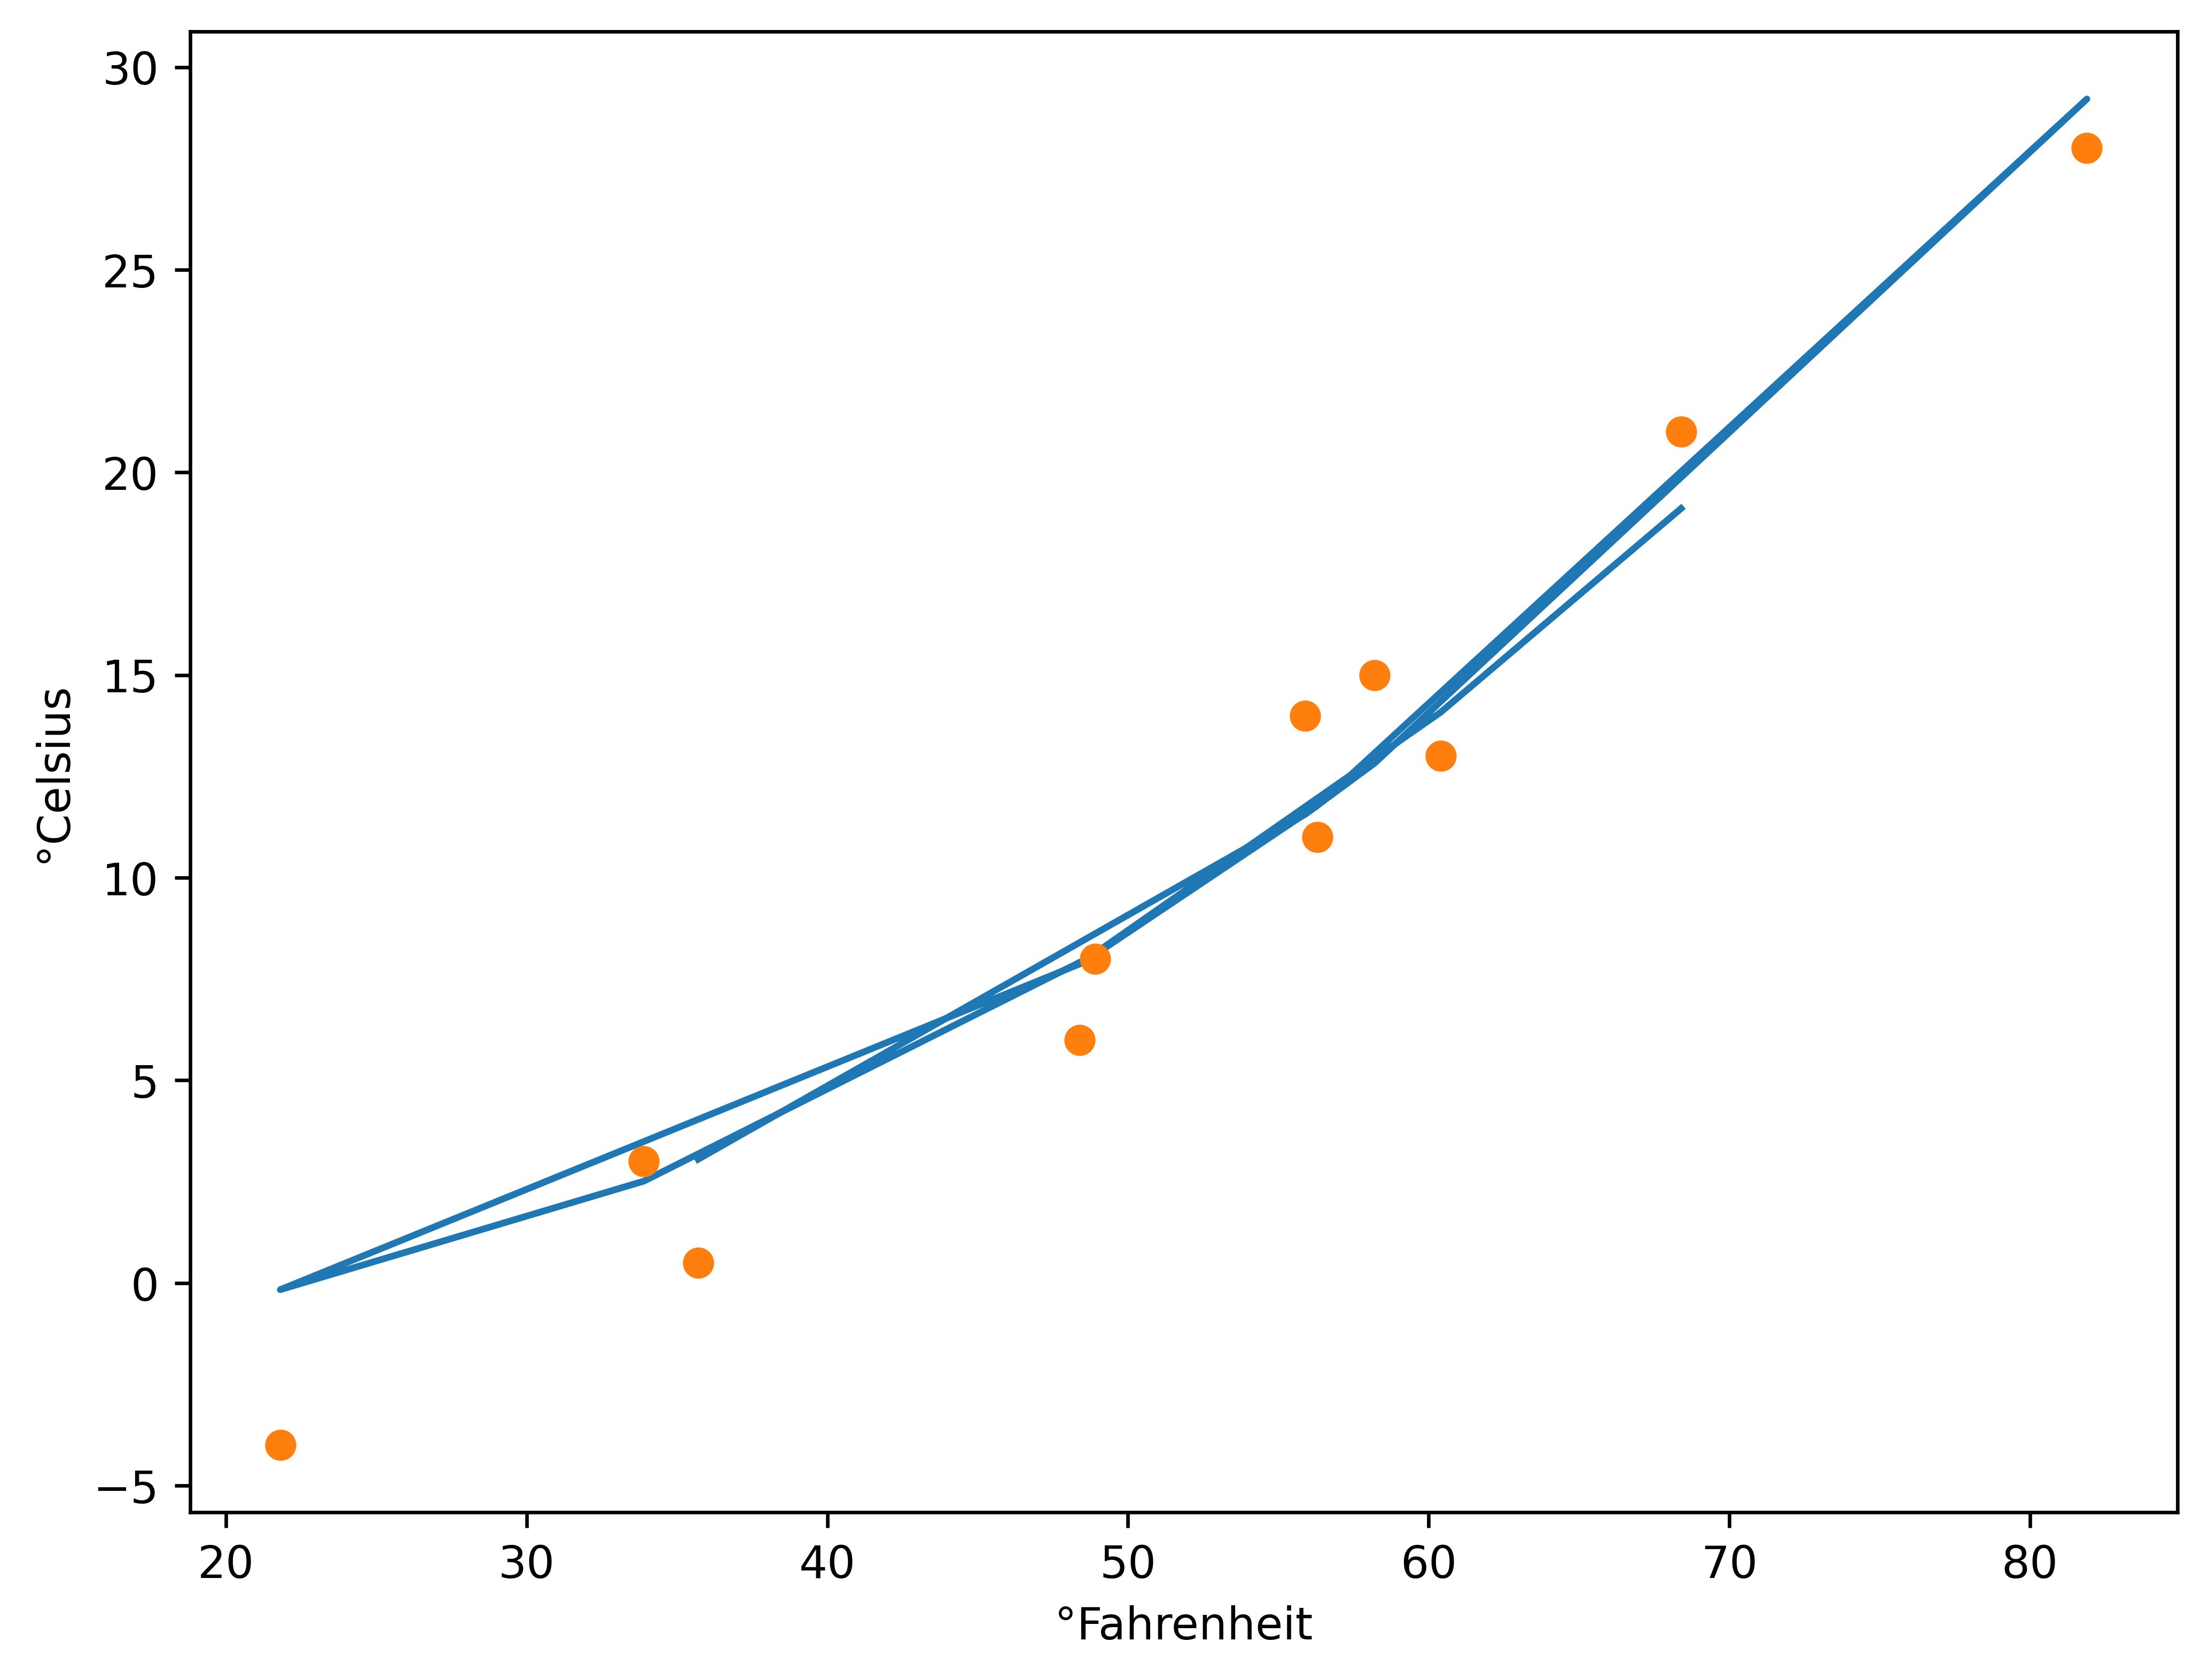

In [186]:
#using matplot library to plot graph needed
%matplotlib inline
t_p = model(t_un, *params)
fig = plt.figure(dpi=600)
plt.rcParams["figure.figsize"] = (8,6)
plt.xlabel("°Fahrenheit")
plt.ylabel("°Celsius")
plt.plot(t_u.numpy(), t_p.detach().numpy())
plt.plot(t_u.numpy(), t_c.numpy(), 'o')

In [187]:
#Mounting Drive
##Form Problems consisting in number 2


from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [188]:
housing = pd.DataFrame(pd.read_csv("/content/drive/MyDrive/Datasets/Housing.csv"))
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [189]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']
spTrain = housing[num_vars]
spTrain.head()

,area,bedrooms,bathrooms,stories,parking,price
0,7420,4,2,3,2,13300000
1,8960,4,4,4,3,12250000
2,9960,3,2,2,2,12250000
3,7500,4,2,2,3,12215000
4,7420,4,1,2,2,11410000


In [190]:
tArea = torch.tensor(spTrain['area'])
tBedrooms = torch.tensor(spTrain['bedrooms'])
tBathrooms = torch.tensor(spTrain['bathrooms'])
tStories = torch.tensor(spTrain['stories'])
tParking = torch.tensor(spTrain['parking'])
tPrice = torch.tensor(spTrain['price'])

In [191]:
tArea_norm = tArea / max(spTrain['area'])
tBedrooms_norm = tBedrooms / max(spTrain['bedrooms'])
tBathrooms_norm = tBathrooms / max(spTrain['bathrooms'])
tStories_norm = tStories / max(spTrain['stories'])
tParking_norm = tParking / max(spTrain['parking'])

In [192]:
def model(tArea, tBedrooms, tBathrooms, tStories, tParking, w1, w2, w3, w4, w5, b):
    return w5*tParking + w4*tStories + w3*tBathrooms + w2*tBedrooms + w1*tArea + b



def loss_fn(tP, tPrice):
    squared_diffs = (tP - tPrice)**2
    return squared_diffs.mean()

In [193]:
#Parameters defining

params = torch.tensor([1.0,1.0,1.0,1.0,1.0,0.0], requires_grad=True)


params.grad is None

True

In [194]:
loss = loss_fn(model(tArea, tBedrooms, tBathrooms, tStories, tParking, *params), tPrice)
loss.backward()
params.grad

tensor([-5.3383e+10, -2.9247e+07, -1.3220e+07, -1.8557e+07, -7.8404e+06,
        -9.5231e+06])

In [195]:
##IF statement to solidify parameters

if params.grad is not None:
    params.grad.zero_()

In [196]:
def training_loop(nEpochs, learnRate, params, tArea, tBedrooms, tBathrooms, tStories, tParking, tPrice):
    for epoch in range(1, nEpochs + 1):
        if params.grad is not None:  # <1>
            params.grad.zero_()

        t_p = model(tArea, tBedrooms, tBathrooms, tStories, tParking, *params)
        loss = loss_fn(t_p, tPrice)
        loss.backward()

        with torch.no_grad():  # <2>
            params -= learnRate * params.grad

        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))

    return params

In [197]:
#Calculates the loss when the learning rate is set at 0.1


params = training_loop(
    nEpochs = 5000,
    learnRate = 0.1,
    params = torch.tensor([1.0,1.0,1.0,1.0,1.0,0.0], requires_grad=True), # <1>
    tArea = tArea_norm,
    tBedrooms = tBedrooms_norm,
    tBathrooms = tBathrooms_norm,
    tStories = tStories_norm,
    tParking = tParking_norm,
    tPrice = tPrice)

Epoch 500, Loss 1562038501376.000000
Epoch 1000, Loss 1533011427328.000000
Epoch 1500, Loss 1531161870336.000000
Epoch 2000, Loss 1531023589376.000000
Epoch 2500, Loss 1531010482176.000000
Epoch 3000, Loss 1531008778240.000000
Epoch 3500, Loss 1531008516096.000000
Epoch 4000, Loss 1531008516096.000000
Epoch 4500, Loss 1531008516096.000000
Epoch 5000, Loss 1531008516096.000000


In [198]:
#Calculate the loss when Learning rate is 0.01


params = training_loop(
    nEpochs = 5000,
    learnRate = 0.01,
    params = torch.tensor([1.0,1.0,1.0,1.0,1.0,0.0], requires_grad=True), # <1>
    tArea = tArea_norm,
    tBedrooms = tBedrooms_norm,
    tBathrooms = tBathrooms_norm,
    tStories = tStories_norm,
    tParking = tParking_norm,
    tPrice = tPrice)

Epoch 500, Loss 2024805761024.000000
Epoch 1000, Loss 1863258734592.000000
Epoch 1500, Loss 1768051179520.000000
Epoch 2000, Loss 1704594898944.000000
Epoch 2500, Loss 1659788853248.000000
Epoch 3000, Loss 1627244199936.000000
Epoch 3500, Loss 1603242295296.000000
Epoch 4000, Loss 1585383211008.000000
Epoch 4500, Loss 1572023042048.000000
Epoch 5000, Loss 1561993281536.000000


In [199]:
#Calculate loss when the Learning rate is 0.001


params = training_loop(
    nEpochs = 5000,
    learnRate = 0.001,
    params = torch.tensor([1.0,1.0,1.0,1.0,1.0,0.0], requires_grad=True), # <1>
    tArea = tArea_norm,
    tBedrooms = tBedrooms_norm,
    tBathrooms = tBathrooms_norm,
    tStories = tStories_norm,
    tParking = tParking_norm,
    tPrice = tPrice)

Epoch 500, Loss 3072061341696.000000
Epoch 1000, Loss 2296906776576.000000
Epoch 1500, Loss 2232370855936.000000
Epoch 2000, Loss 2193781817344.000000
Epoch 2500, Loss 2159230582784.000000
Epoch 3000, Loss 2127642755072.000000
Epoch 3500, Loss 2098654216192.000000
Epoch 4000, Loss 2071965073408.000000
Epoch 4500, Loss 2047316459520.000000
Epoch 5000, Loss 2024483717120.000000


In [200]:
#calculate the loss for learn rate at 0.0001


params = training_loop(
    nEpochs = 5000,
    learnRate = 0.0001,
    params = torch.tensor([1.0,1.0,1.0,1.0,1.0,0.0], requires_grad=True), # <1>
    tArea = tArea_norm,
    tBedrooms = tBedrooms_norm,
    tBathrooms = tBathrooms_norm,
    tStories = tStories_norm,
    tParking = tParking_norm,
    tPrice = tPrice)

Epoch 500, Loss 19251110871040.000000
Epoch 1000, Loss 14310294159360.000000
Epoch 1500, Loss 10812095725568.000000
Epoch 2000, Loss 8334880538624.000000
Epoch 2500, Loss 6580248510464.000000
Epoch 3000, Loss 5337011716096.000000
Epoch 3500, Loss 4455729725440.000000
Epoch 4000, Loss 3830616424448.000000
Epoch 4500, Loss 3386812137472.000000
Epoch 5000, Loss 3071338610688.000000


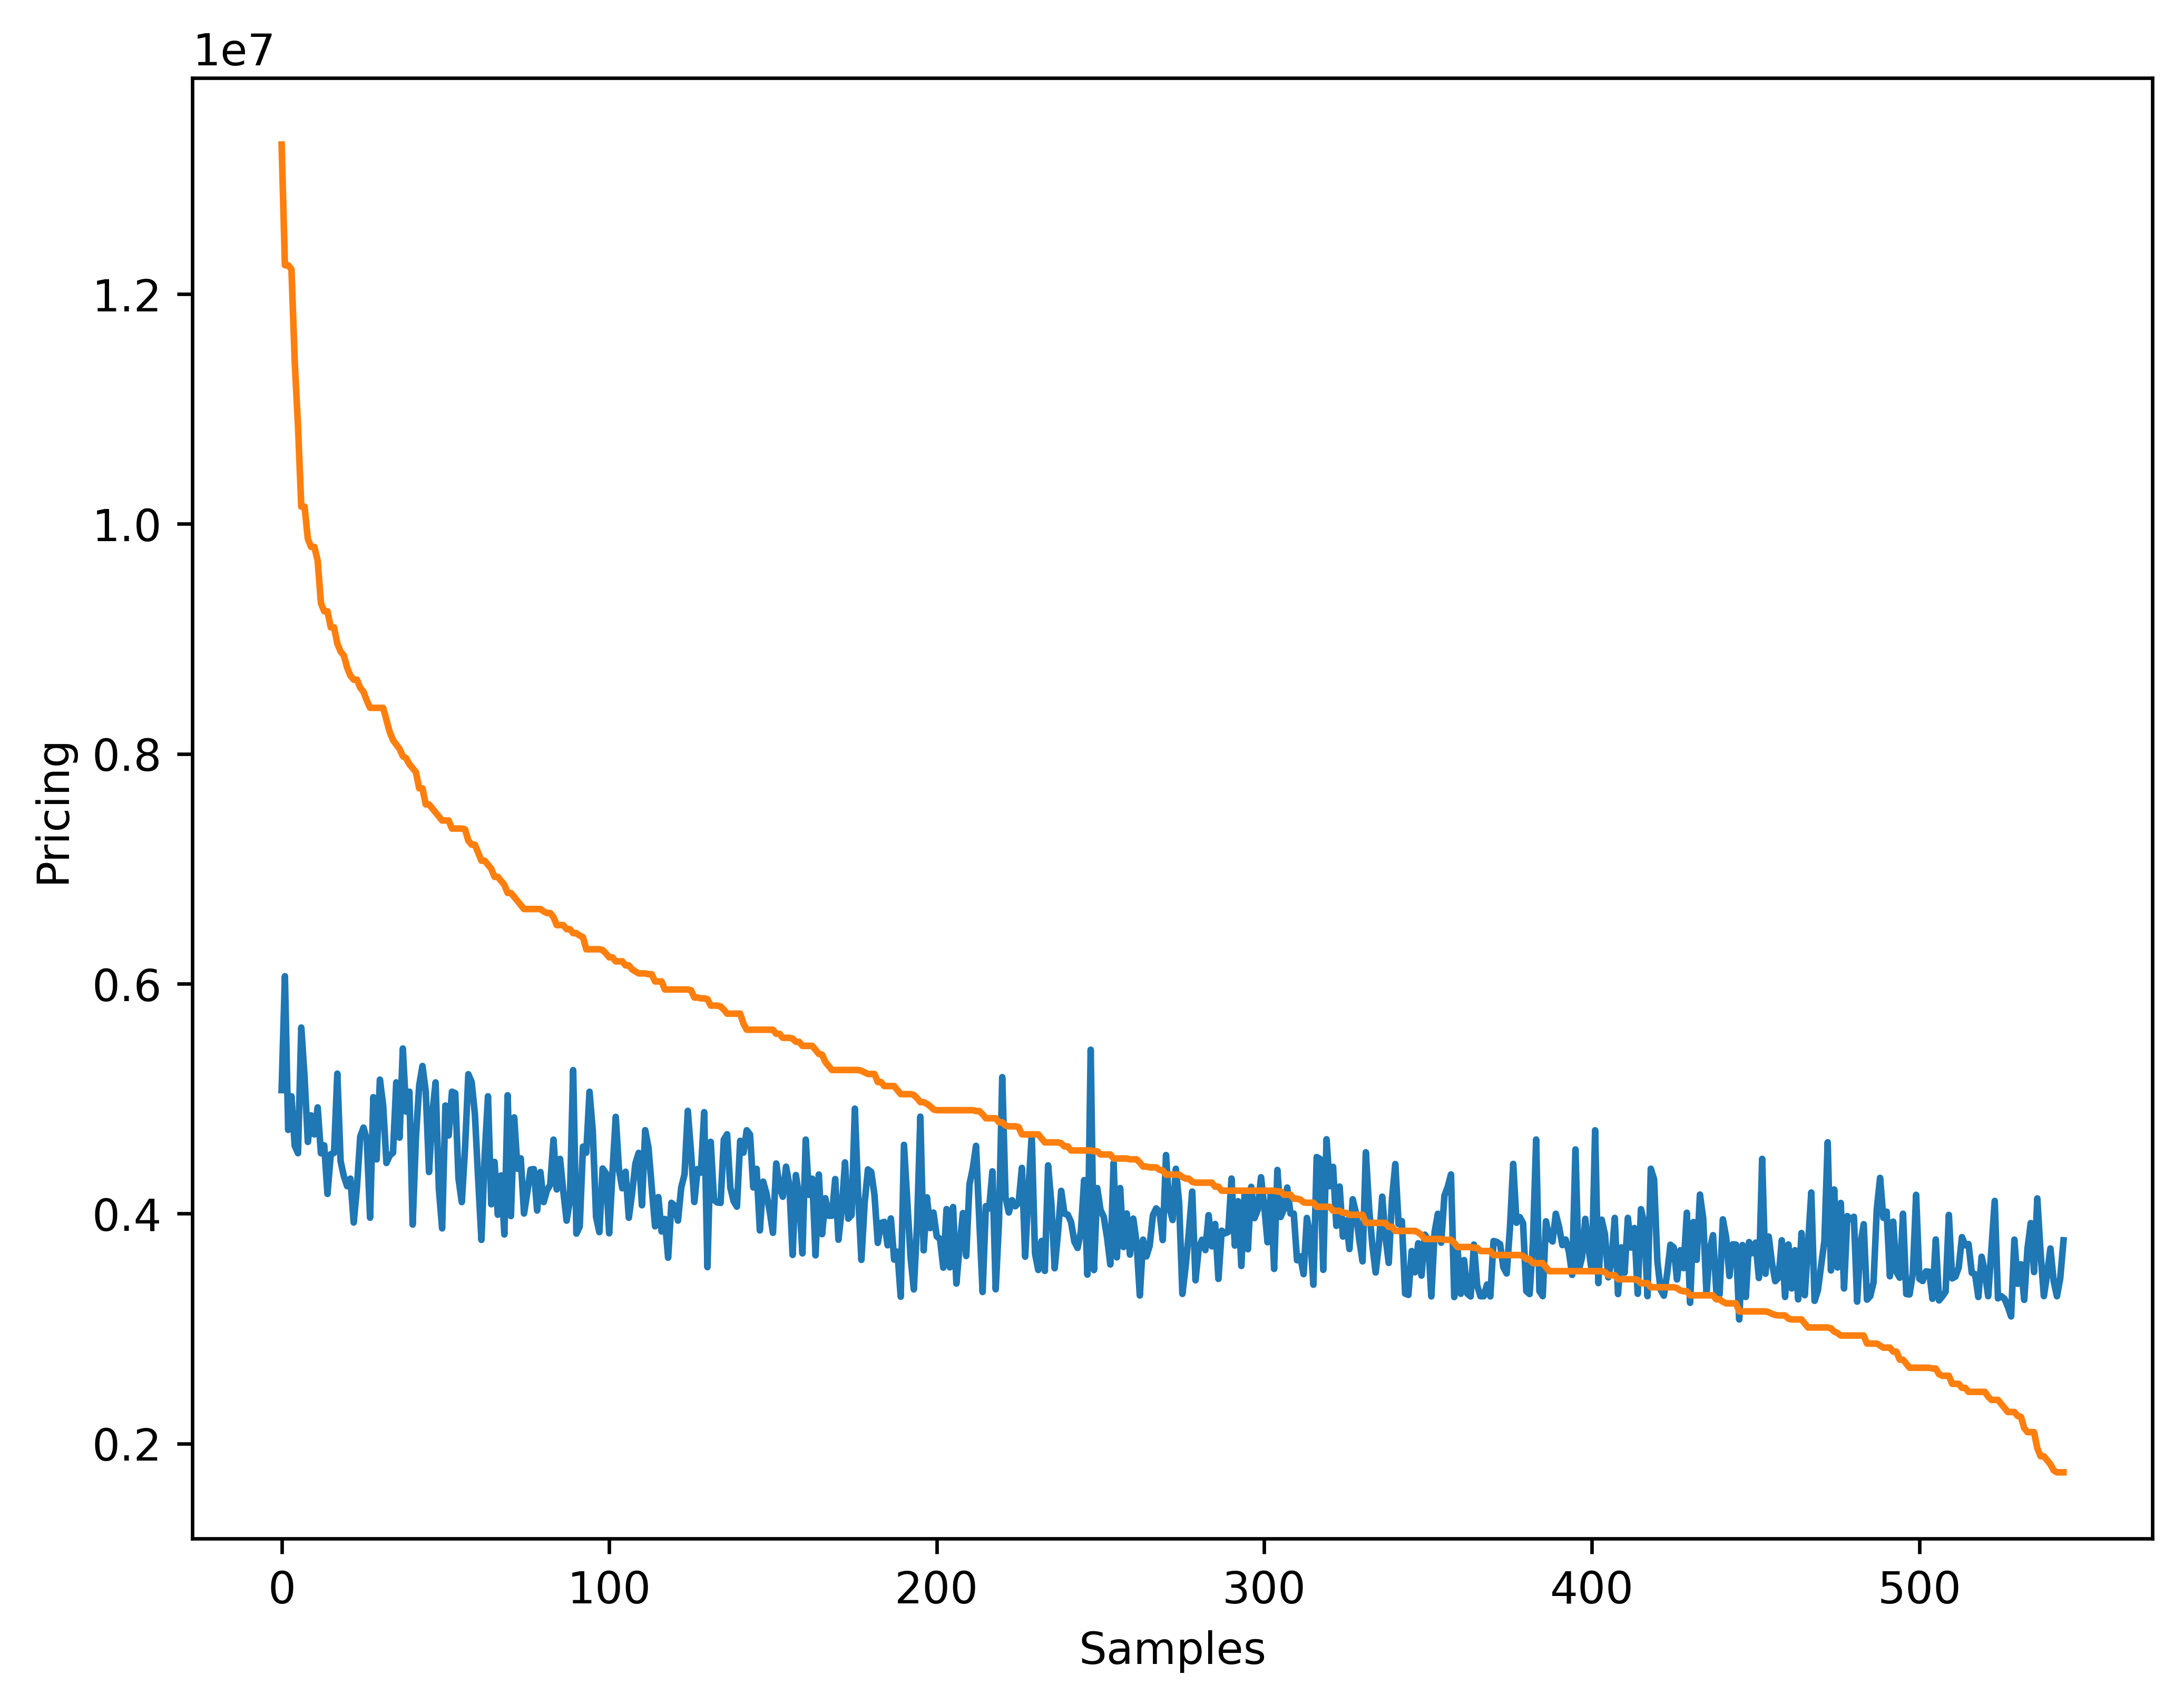

In [201]:
#Plotting pricing versus samples
%matplotlib inline
#t_area, t_bedrooms, t_bathrooms, t_stories, t_parking
t_p = model(tArea_norm, tBedrooms_norm, tBathrooms_norm, tStories_norm, tParking_norm, *params)
fig = plt.figure(dpi=600)
plt.xlabel("Samples")
plt.ylabel("Pricing")
plt.plot(t_p.detach().numpy())
plt.plot(tPrice)


In [202]:
##Problem 3 repeating problem 2 but uses all inputs

In [203]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [204]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price', 'mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea','furnishingstatus']
spTrain = housing[num_vars]
spTrain.head()

,area,bedrooms,bathrooms,stories,parking,price,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,2,13300000,yes,no,no,no,yes,2,yes,furnished
1,8960,4,4,4,3,12250000,yes,no,no,no,yes,3,no,furnished
2,9960,3,2,2,2,12250000,yes,no,yes,no,no,2,yes,semi-furnished
3,7500,4,2,2,3,12215000,yes,no,yes,no,yes,3,yes,furnished
4,7420,4,1,2,2,11410000,yes,yes,yes,no,yes,2,no,furnished


In [205]:

housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [206]:
#gotta change the yes/no values to numerical for regression will not allow

varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)

# Check the housing dataframe now
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,yes,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,no,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,yes,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,yes,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,no,furnished


In [207]:
# train and test to same rows
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state=42)
df_train.shape

(436, 13)

In [208]:
#shaping
df_test.shape

(109, 13)

In [281]:
##for new data required in part 3

num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']
dfNewtrain = df_train[num_vars]
dfNewtest = df_test[num_vars]
dfNewtrain.head()

,area,bedrooms,bathrooms,stories,parking,price
46,6000,3,2,4,1,7525000
93,7200,3,2,1,3,6300000
335,3816,2,1,1,2,3920000
412,2610,3,1,2,0,3430000
471,3750,3,1,2,0,3010000


In [277]:
dfNewtrain.shape


(436, 6)

In [270]:
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [278]:
##Standard Scaler with defining
#Importing the sklearn preprocess lib and minmaxscale and standard scale
scaler = MinMaxScaler()
dfNewtrain[num_vars] = scaler.fit_transform(dfNewtrain[num_vars])
dfNewtest[num_vars] = scaler.fit_transform(dfNewtest[num_vars])
dfNewtrain.head(20)

,area,bedrooms,bathrooms,stories,parking,price
46,0.298969,0.4,0.333333,1.000000,0.333333,0.550000
93,0.381443,0.4,0.333333,0.000000,1.000000,0.433333
335,0.148866,0.2,0.000000,0.000000,0.666667,0.206667
412,0.065979,0.4,0.000000,0.333333,0.000000,0.160000
471,0.144330,0.4,0.000000,0.333333,0.000000,0.120000
237,0.230928,0.4,0.000000,0.333333,0.000000,0.273333
544,0.151203,0.4,0.000000,0.333333,0.000000,0.000000
470,0.235464,0.4,0.000000,0.000000,0.000000,0.120000
511,0.105155,0.4,0.000000,0.000000,0.000000,0.073333
361,0.300344,0.4,0.000000,0.000000,0.000000,0.186667


In [282]:
#NEw training


yNewtrain = dfNewtrain.pop('price')
xNewtrain = dfNewtrain
yNewtest = dfNewtest.pop('price')
xNewtest = dfNewtest

In [283]:
#New test and training values


yNewtrain = torch.tensor(yNewtrain.values).float()
yNewtrain = yNewtrain[:,None]
xNewtrain = torch.tensor(xNewtrain.values).float()
yNewtest = torch.tensor(yNewtest.values).float()
yNewtest = yNewtest[:,None]
xNewtest = torch.tensor(xNewtest.values).float()

In [284]:
def trainingLoop(n_epochs, optimizer, model, loss_fn, tu_train, t_u_val,
                  tc_train, tc_val):
    for epoch in range(1, n_epochs + 1):
        t_p_train = model(tu_train)
        loss_train = loss_fn(t_p_train, tc_train)

        t_p_val = model(t_u_val)
        loss_val = loss_fn(t_p_val, tc_val)

        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()

        if epoch == 1 or epoch % 10 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"
                  f" Validation loss {loss_val.item():.4f}")

In [285]:
seq_model1 = nn.Sequential(
    nn.Linear(5,8),
    nn.Tanh(),
    nn.Linear(8, 5))
seq_model1

Sequential(
  (0): Linear(in_features=5, out_features=8, bias=True)
  (1): Tanh()
  (2): Linear(in_features=8, out_features=5, bias=True)
)

In [286]:
seq_model2 = nn.Sequential(
    nn.Linear(5,8),
    nn.Tanh(),
    nn.Linear(8,4),
    nn.Tanh(),
    nn.Linear(4,2),
    nn.Tanh(),
    nn.Linear(2, 5))
seq_model2

Sequential(
  (0): Linear(in_features=5, out_features=8, bias=True)
  (1): Tanh()
  (2): Linear(in_features=8, out_features=4, bias=True)
  (3): Tanh()
  (4): Linear(in_features=4, out_features=2, bias=True)
  (5): Tanh()
  (6): Linear(in_features=2, out_features=5, bias=True)
)

In [288]:
optimizer = optim.SGD(seq_model1.parameters(), lr=1e-3)
training_loop(200, optimizer, seq_model1, nn.MSELoss(), xNewtrain, xNewtest, yNewtrain, yNewtest)

Epoch 1, Training loss 25234793037824.0000, Validation loss 30129992499200.0000
Epoch 10, Training loss 23842472853504.0000, Validation loss 28647182303232.0000
Epoch 20, Training loss 22397847601152.0000, Validation loss 27105395998720.0000
Epoch 30, Training loss 21053755621376.0000, Validation loss 25667584393216.0000
Epoch 40, Training loss 19803198717952.0000, Validation loss 24326629752832.0000
Epoch 50, Training loss 18639667331072.0000, Validation loss 23075898785792.0000
Epoch 60, Training loss 17557106982912.0000, Validation loss 21909230059520.0000
Epoch 70, Training loss 16549882626048.0000, Validation loss 20820877377536.0000
Epoch 80, Training loss 15612750331904.0000, Validation loss 19805488807936.0000
Epoch 90, Training loss 14740830027776.0000, Validation loss 18858087809024.0000
Epoch 100, Training loss 13929589768192.0000, Validation loss 17974035480576.0000
Epoch 110, Training loss 13174803791872.0000, Validation loss 17149020078080.0000
Epoch 120, Training loss 12

In [289]:
optimizer = optim.SGD(seq_model2.parameters(), lr=1e-3)
training_loop(200, optimizer, seq_model2, nn.MSELoss(), xNewtrain, xNewtest, yNewtrain, yNewtest)

Epoch 1, Training loss 25234793037824.0000, Validation loss 30129992499200.0000
Epoch 10, Training loss 24795838152704.0000, Validation loss 29662826725376.0000
Epoch 20, Training loss 24280639209472.0000, Validation loss 29114144653312.0000
Epoch 30, Training loss 23777662468096.0000, Validation loss 28578087436288.0000
Epoch 40, Training loss 23286618521600.0000, Validation loss 28054359375872.0000
Epoch 50, Training loss 22807230545920.0000, Validation loss 27542671065088.0000
Epoch 60, Training loss 22339215425536.0000, Validation loss 27042745679872.0000
Epoch 70, Training loss 21882306822144.0000, Validation loss 26554304299008.0000
Epoch 80, Training loss 21436238397440.0000, Validation loss 26077086875648.0000
Epoch 90, Training loss 21000758493184.0000, Validation loss 25610820780032.0000
Epoch 100, Training loss 20575607062528.0000, Validation loss 25155256451072.0000
Epoch 110, Training loss 20160545030144.0000, Validation loss 24710142230528.0000
Epoch 120, Training loss 19